# Tutorial
Examples on how to use the modules in the modules directory of this repo. 

In [15]:
import sys
sys.path.append('..')

from modules.registration import register_images, match_keypoints, tre_distance, apply_transform
from modules.utils import show_keypoints

from imageio import imread
import cv2
from skimage import transform
import matplotlib.pyplot as plt

In [2]:
# variables to use in examples
moving_im_filepath = '/media/jc/NVME_SSD/SageBionetworks/normalBreast/R1_PCNA.CD8.PD1.CK19_SMT130-4_2019_05_08__12_15__1613S-Scene-012_c1_ORG.tif'
target_im_filepath = '/media/jc/NVME_SSD/SageBionetworks/normalBreast/R2_CK5.HER2.ER.CD45_SMT130-4_2019_05_09__21_52__1654S-Scene-012_c1_ORG.tif'

In [14]:
# read images to numpy arrays
moving_im = imread(moving_im_filepath)
target_im = imread(target_im_filepath)

# use the default KAZE image features for keypoints
ft_extractor = cv2.KAZE_create(extended=True)

# transformation method to use with the matched keypoints
transformer = transform.SimilarityTransform()

## Keypoint matching

Matching image keypoints between two images allows the calculation of the Target Registration Error (TRE) between the images. TRE can be used as measure of how aligned / registered two images are**.

Matching keypoints can also be used in transformations. In this work, keypoints are used in simple linear keypoint registration.

** TRE is only successful using keypoints from two images that have very similar signal, such as the DAPI channel between rounds. It should not be used to measure the alignement / registration between other channels in different rounds, since the signal is different in each channel that is not DAPI.

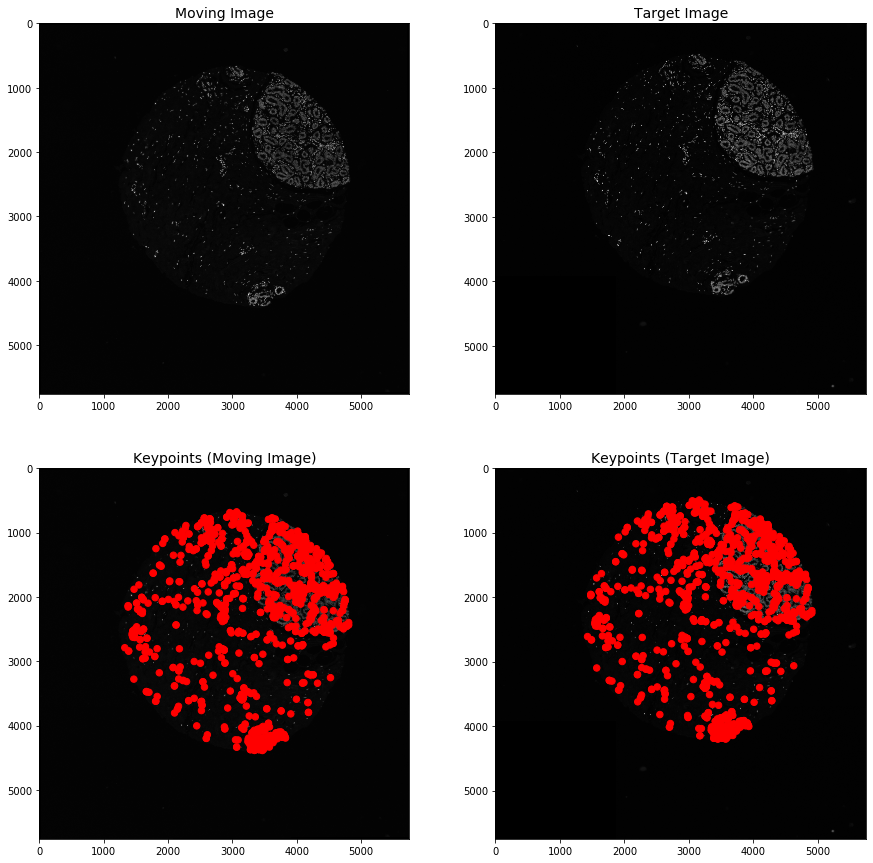

In [5]:
# obtain the matching keypoints between the images
moving_pts, target_pts = match_keypoints(moving_im, target_im, ft_extractor)

# visualize results
show_keypoints(moving_im, target_im, moving_pts, target_pts)

## Target Registration Error (TRE)
Calculating TRE between is easy, all you need is the matched keypoints between the images which can be obtained from the match_keypoints functions (see above). The keypoints should be obtained from the DAPI (or similar) channel only for calculating the TRE between two images.

In [10]:
# obtain the matching keypoints between the images (same as above)
moving_pts, target_pts = match_keypoints(moving_im, target_im, ft_extractor)

# calculate the TRE, the height and width passed should be from the MOVING image
height, width = moving_im.shape[:2]
tre = tre_distance(moving_pts, target_pts, height, width)
print(f'TRE between moving and target image is: {tre}')

TRE between moving and target image is: 0.025852495804429054


## Keypoint Linear Registration
Use the matched keypoints to register two images using a linear approach.

TRE between registered moving and target image is: 0.0001077898100656961


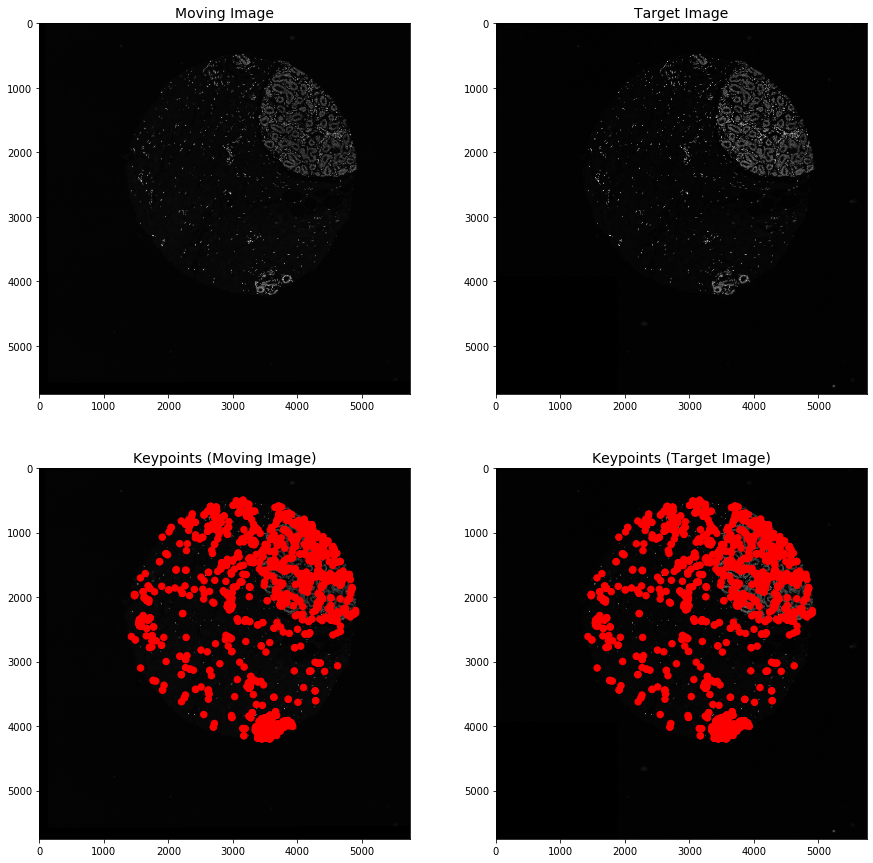

In [20]:
# obtain the matching keypoints between the images (same as above)
moving_pts, target_pts = match_keypoints(moving_im, target_im, ft_extractor)

# apply the transformation, provide the transformation method (transformer) and the keypoints
registered_im, registered_kpts = apply_transform(moving_im, target_im, moving_pts, target_pts, transformer)

# check the new TRE between the target image and the registered image
height, width = moving_im.shape[:2]
tre = tre_distance(registered_kpts, target_pts, height, width)
print(f'TRE between registered moving and target image is: {tre}')

# visualize results with registered image
show_keypoints(registered_im, target_im, registered_kpts, target_pts)

## Keypoint Registration Function
Look at the modules.registration.register_images function for a useful function that wraps most of the functions shown above into one for quickly registering two images together with keypoint linear registration, returning the registered images and TRE distance with and without registration.

## SimpleElastix
SimpleElastix can be used to perform intensity based registration methods, which can be rigid or non-rigid.